In [1]:
import sys
sys.path.append('/Users/vdk/GeneveWork/Code/calibpipe-main-calibpipe/')
from astropy.io import ascii
import numpy as np
import pandas as pd
import matplotlib
import csv
import scipy
import matplotlib.pyplot as plt
from seaborn import histplot
import random
import copy
from os import path, makedirs
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astropy.units as u
from ctapipe.containers import MuonEfficiencyContainer
from ctapipe.coordinates import CameraFrame, TelescopeFrame
from ctapipe.io import EventSource, EventSeeker
from ctapipe.core import TelescopeComponent
from ctapipe.core.traits import (
    List,
    Int,
    FloatTelescopeParameter,
    TelescopeParameter,
    Unicode,
)
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.muon import MuonRingFitter, MuonIntensityFitter
from traitlets.config import Config
from ctapipe.image import ImageProcessor
from ctapipe.image.muon import MuonProcessor
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from ctapipe.calib import CameraCalibrator
from traitlets.config.loader import Config, FileConfigLoader, JSONFileConfigLoader
import pathlib
from calibpipe.throughput import MuonCalibrator
from traitlets.config import Config
from astropy.time import Time
from astropy.coordinates import EarthLocation,SkyCoord, AltAz 
from traitlets.config import Config




In [ ]:
filename = '/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run1.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

In [ ]:
source.subarray.peek()

In [ ]:
print(source.subarray.tel)

In [ ]:
#filename = '/Users/vdk/MST_work/data_muons/mono_proton_simtel/proton_20deg_0deg_run2___cta-prod6-paranal-2147m-Paranal-nshow-3000-0-LSTs-1-MSTs-0-SSTs-NSCAT_5_CSCAT_300_EMIN_1_EMAX_200_after_muontag.simtel.zst'
#filename = '/Users/vdk/MST_work/data_muons/mono_muon_simtel/muon_20deg_0deg_run0___cta-prod6-paranal-2147m-Paranal-0-LSTs-1-MSTs-0-SSTs-NSCAT_1_CSCAT_8_EMIN_0.005_EMAX_1_FIXCHI_600_VIEWCONE_3_after_muontag.simtel.zst'
#filename = '/Users/vdk/sim_run_folder/test321.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)



for i,j in enumerate(event_iterator):
    if i == 1:
        telescope = 1
        event = j
        image_processor = ImageProcessor(source.subarray)
        muon_processor = MuonProcessor(source.subarray)
        calib = CameraCalibrator(
                image_extractor_type="GlobalPeakWindowSum",
                subarray = source.subarray)
        calib(j)
        image_processor(j)
        muon_processor(j)
        fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
        fig.subplots_adjust(hspace=0.2)
        ax = axes[0]
        camgeom = source.subarray.tel[telescope].camera.geometry
        title="TrueImage run {} if {} fit {} width {}".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = ax)
        disp.image = j.simulation.tel[telescope].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        bx = axes[1]
        for pix_id in range(0,1764):
            bx.plot(j.r0.tel[telescope].waveform[0][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
        bx.set_ylabel("ADC counts")
        bx.set_xlabel("Samples")
        bx.set_title("Waveforms")
        plt.show()
        #plt.savefig(f"/Users/vdk/MST_ProtonImages_NewQualityCheck/TrueImage+Waveform_mstPROTON_event{j.index.event_id}_obs{j.index.obs_id}_numer{i}")
        #plt.savefig(f"/Users/vdk/TrueImage+Waveform_mstMUON_event{j.index.event_id}_obs{j.index.obs_id}")
        break
        #if i == 150:
        #    break

plt.close()

In [ ]:
filename = '/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run1.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)
for i,j in enumerate(event_iterator):
    print(i, j.trigger.tels_with_trigger)
    

In [ ]:
filename = '/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run1.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

In [ ]:
event = next(event_iterator)

In [ ]:
for i in range(len(event.trigger.tels_with_trigger)):
    print(event.trigger.tels_with_trigger[i])




In [ ]:
camgeom = source.subarray.tel[1].camera.geometry

In [ ]:
disp = CameraDisplay(camgeom)
disp.image = next(event_iterator).simulation.tel[3].true_image

In [ ]:
event = next(event_iterator)

In [ ]:
print(len(event.simulation.tel[10].true_image))

In [ ]:
filename = '/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run1.simtel.gz'
source = EventSource(filename, max_events=10000)
event_iterator = iter(source)

events = [copy.deepcopy(event) for event in source]


for i,j in enumerate(event_iterator):
    print(f"Telescope with data: {event.r1.tel.keys()} in the events number {i}")

In [ ]:
obstime = Time("2013-11-01T03:00")
location = EarthLocation.of_site("Roque de los Muchachos")

altaz = AltAz(location=location, obstime=obstime)

array_pointing = SkyCoord(
    alt=event.pointing.array_azimuth,
    az=event.pointing.array_altitude,
    frame=altaz,
)

print(array_pointing)

In [ ]:
filename = '/Users/vdk/sim_run_folder/corsika_theta_28.4_az_182.75_run2.simtel.gz'
source = EventSource(filename, max_events=10000)
event_iterator = iter(source)

events = [copy.deepcopy(event) for event in source]
events[4]

In [ ]:
events[12].trigger.tel[3]

In [ ]:
stereo_mask = []
for i in events:
    check_LST1 = 1 in i.trigger.tels_with_trigger
    check_LST2 = 2 in i.trigger.tels_with_trigger
    if check_LST1 and check_LST2:
        stereo_mask.append(True)
        print(True)
    else:
        stereo_mask.append(False)        
        print(False)

In [ ]:
stereo_events = []
for i,j in enumerate(events):
    if stereo_mask[i]:
        stereo_events.append(j)
        print(j.trigger.tels_with_trigger)


In [ ]:
#for i in stereo_events:
    #print(i.trigger.tels_with_trigger)
len(stereo_events)

In [ ]:
source.subarray.peek()

In [ ]:
telescope = 1
camgeom = source.subarray.tel[telescope].camera.geometry
disp = CameraDisplay(camgeom)
disp.image = events[12].simulation.tel[telescope].true_image #.sum(axis=1)
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()

In [ ]:
telescope = 3
camgeom = source.subarray.tel[telescope].camera.geometry
disp = CameraDisplay(camgeom)
disp.image = events[6].simulation.tel[telescope].true_image #.sum(axis=1)
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()

In [ ]:
stereo_events[2].trigger.tels_with_trigger

In [ ]:
filename = '/Users/vdk/sim_run_folder/test123.simtel.gz'
source = EventSource(filename, max_events=10000)
event_iterator = iter(source)

for i,j in enumerate(event_iterator):
        telescope = 1
        event = j
        fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
        fig.subplots_adjust(hspace=0.2)
        ax = axes[0]
        camgeom = source.subarray.tel[1].camera.geometry
        title="TrueImage stereo trigger LST1".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = ax)
        disp.image = j.simulation.tel[telescope].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        bx = axes[1]
        camgeom = source.subarray.tel[1].camera.geometry
        title="TrueImage stereo trigger LST1".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = bx)
        disp.image = j.simulation.tel[2].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        #bx.set_ylabel("ADC counts")
        #bx.set_xlabel("")
        bx.set_title("LST2")
        #plt.show()
        plt.savefig(f"/Users/vdk/StereoProton_event{j.index.event_id}_obs{j.index.obs_id}_numer{i}")
        #plt.savefig(f"/Users/vdk/TrueImage+Waveform_mstMUON_event{j.index.event_id}_obs{j.index.obs_id}")
        #if i == 150:
        #    break

plt.close()

In [ ]:
# pipeline to extract only stereo trigger for 2 LSTs
filename = '/Users/vdk/sim_run_folder/run1_nt2_mt2_at1.simtel.gz'
source = EventSource(filename, max_events=10000)
event_iterator = iter(source)

events = [copy.deepcopy(event) for event in source]

stereo_mask = []
for i in events:
    check_LST1 = 1 in i.trigger.tels_with_trigger
    check_LST2 = 2 in i.trigger.tels_with_trigger
    if check_LST1 and check_LST2:
        stereo_mask.append(True)
        #print(True)
    else:
        stereo_mask.append(False)        
        #print(False)

stereo_events = []
for i,j in enumerate(events):
    if stereo_mask[i]:
        stereo_events.append(j)
        #print(j.trigger.tels_with_trigger)

print("events = ", len(events))
print("stereo events = ", len(stereo_events))
source.subarray.peek()

In [ ]:
for i,j in enumerate(stereo_events):
        telescope = 1
        event = j
        fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
        fig.subplots_adjust(hspace=0.2)
        ax = axes[0]
        camgeom = source.subarray.tel[1].camera.geometry
        title="TrueImage stereo trigger LST1".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = ax)
        disp.image = j.simulation.tel[telescope].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        bx = axes[1]
        camgeom = source.subarray.tel[1].camera.geometry
        title="TrueImage stereo trigger LST1".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = bx)
        disp.image = j.simulation.tel[2].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        #bx.set_ylabel("ADC counts")
        #bx.set_xlabel("")
        bx.set_title("LST2")
        #plt.show()
        plt.savefig(f"/Users/vdk/StereoProtonNT2MT2_AT1_event{j.index.event_id}_obs{j.index.obs_id}_numer{i}")
        #plt.savefig(f"/Users/vdk/TrueImage+Waveform_mstMUON_event{j.index.event_id}_obs{j.index.obs_id}")
        #if i == 150:
        #    break

plt.close()

In [ ]:
for i in stereo_events:
    print(i.trigger.tels_with_trigger)

In [ ]:
source.subarray.tels

In [ ]:
# pipeline to extract only stereo trigger for 2 LSTs
all_events = []
for i in range(1,41):
    filename = f'/Users/vdk/sim_run_folder/numtele2_maxtele2_arraytelescope1/corsika_theta_28.4_az_182.75_run{i}.simtel.gz'
    source = EventSource(filename, max_events=10000)
    events = [copy.deepcopy(event) for event in source]
    all_events.append(events)

#stereo_mask = []
#for i in events:
#    check_LST1 = 1 in i.trigger.tels_with_trigger
#    check_LST2 = 2 in i.trigger.tels_with_trigger
#    if check_LST1 and check_LST2:
#        stereo_mask.append(True)
#        #print(True)
#    else:
#        stereo_mask.append(False)        
#        #print(False)

#stereo_events = []
#for i,j in enumerate(events):
#    if stereo_mask[i]:
#        stereo_events.append(j)
#        #print(j.trigger.tels_with_trigger)

#print("events = ", len(events))
#print("stereo events = ", len(stereo_events))
#source.subarray.peek()



In [ ]:
full_stereo_events = []
count = 0
for j in range(1,40):
    for i in all_events[j]:
        count += 1
        if len(i.trigger.tels_with_trigger) > 1:
            full_stereo_events.append(i)

In [ ]:
len(full_stereo_events)

In [ ]:
count

In [48]:
###
# Algorithm to process events and try to calibrate them
###
int_cut = 0.3
min_pixel = 150

muon_processor_config = Config({"MuonProcessor": 
                                {"RingQuery": 
                                 {"quality_criteria" : [["intensity_check",f"np.abs(parameters.intensity_ratio - 1) < {int_cut}"],
                                                        ["ring_containment", "parameters.containment > 0.5"],
                                                        ["ring_completeness", "parameters.completeness > 0.5"]]}}})

#muon_processor_config = Config({"MuonProcessor":
#                                {"ImageParameterQuery" :
#                                {"quality_criteria" : [["min_pixels", f"dl1_params.morphology.n_pixels > {min_pixel}"],
#                                                        ["min_intensity", "dl1_params.hillas.intensity > 500"]]}}})

muon_processor_config_2 = Config({"MuonProcessor":
                                {"ImageParameterQuery" :
                                 {"quality_criteria" : [["min_pixels", f"dl1_params.morphology.n_pixels > {min_pixel}"],
                                                        ["min_intensity", "dl1_params.hillas.intensity > 500"]]}}})

checker = 0
event_container = {}
for k in range(1,41):
    filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
    source = EventSource(filename, max_events=9000)
    event_iterator = iter(source)
    keks = k*1000
    for i,j in enumerate(event_iterator):
        checker += 1
        if len(j.trigger.tels_with_trigger) > 1:            
            image_processor = ImageProcessor(source.subarray)
            muon_processor = MuonProcessor(source.subarray, config = muon_processor_config_2)
            #muon_processor = MuonProcessor(source.subarray)
            calib = CameraCalibrator(
                image_extractor_type="GlobalPeakWindowSum",
                subarray = source.subarray)
            calib(j)
            image_processor(j)
            muon_processor(j)
            for m in j.muon.tel.keys():
                if not np.isnan(j.muon.tel[m].efficiency.width):
                    event_container[keks+i] = j
        
        
            
            
        

/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: in

/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/ctapipe/image/pixel_likelihood.py:98: RuntimeWarning: invalid value encountered in log
  neg_log_l = np.log(theta + EPSILON) + (image - prediction) ** 2 / theta


In [44]:
### NEW CLEANING NEW CLEANING NEW CLEANING
####
###
###
# Algorithm to process events and calibrate with new cleaning algo
###
int_cut = 0.2
min_pixel = 250

muon_processor_config = Config({"MuonProcessor": 
                                {"RingQuery": 
                                 {"quality_criteria" : [["intensity_check",f"np.abs(parameters.intensity_ratio - 1) < {int_cut}"],
                                                        ["ring_containment", "parameters.containment > 0.5"],
                                                        ["ring_completeness", "parameters.completeness > 0.5"]]}}})

#muon_processor_config = Config({"MuonProcessor":
#                                {"ImageParameterQuery" :
#                                {"quality_criteria" : [["min_pixels", f"dl1_params.morphology.n_pixels > {min_pixel}"],
#                                                        ["min_intensity", "dl1_params.hillas.intensity > 500"]]}}})

muon_processor_config_2 = Config({"MuonProcessor":
                                {"ImageParameterQuery" :
                                 {"quality_criteria" : [["min_pixels", f"dl1_params.morphology.n_pixels > {min_pixel}"],
                                                        ["min_intensity", "dl1_params.hillas.intensity > 500"]]}}})

checker = 0
event_container = {}
for k in range(1,41):
    filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
    source = EventSource(filename, max_events=9000)
    event_iterator = iter(source)
    keks = k*1000
    for i,j in enumerate(event_iterator):
        checker += 1
        if len(j.trigger.tels_with_trigger) > 1: 
            event = j
            image_processor = ImageProcessor(source.subarray)
            muon_processor = MuonProcessor(source.subarray, config = muon_processor_config)
            for k,l in enumerate(event.r0.tel[tel_number].waveform[1]):
                if np.argmax(l) in [13,14,15]: 
                    pixel_mask.append(True)
                else:
                    pixel_mask.append(False)
            working_wave = event.r1.tel[tel_number].waveform.copy()
            for k,l in enumerate(working_wave):
                if not pixel_mask[k]:
                working_wave[k] = np.zeros(40)     
                #working_wave[k] = np.min(event.r1.tel[tel_number].waveform, axis = 0)
            working_waves.append(working_wave)            
            event.r1.tel[tel_numbers[i]].waveform = working_waves[i]
            image_processor = ImageProcessor(source.subarray)
            muon_processor = MuonProcessor(source.subarray)
            calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum",subarray = source.subarray)
            calib(event)
            image_processor(event)
            muon_processor(event)
            for m in j.muon.tel.keys():
                if not np.isnan(j.muon.tel[m].efficiency.width):
                    event_container[keks+i] = j
        
        
            
            
        


IndentationError: expected an indented block after 'if' statement on line 46 (4058377748.py, line 47)

In [46]:
print("fitted events - ", len(event_container))
print("overall dataset - ", checker)

fitted events -  34
overall dataset -  18295


In [ ]:
print(len(event_container))

In [ ]:
for i in event_container:
    for m in event_container[i].trigger.tel.keys():
        print("m", m)
        print(event_container[i].index.event_id, "= ", event_container[i].muon.tel[m].efficiency.optical_efficiency)

In [36]:
len(event_container)

30

In [30]:
optical_coef = []

In [42]:
optical_coef = []
for i in event_container:
    for m in event_container[i].trigger.tel.keys():
        #print(np.isnan(event_container[i].muon.tel[m].efficiency.optical_efficiency))
        if not np.isnan(event_container[i].muon.tel[m].efficiency.optical_efficiency):
            optical_coef.append(event_container[i].muon.tel[m].efficiency.optical_efficiency)

print(np.mean(optical_coef))
print(np.std(optical_coef))
print(np.std(optical_coef)/np.mean(optical_coef))
print(len(optical_coef))
#optical_coef = optical_coef[0:31]

0.18086680501618294
0.023829412866127143
0.13175116829202033
30


<ErrorbarContainer object of 3 artists>

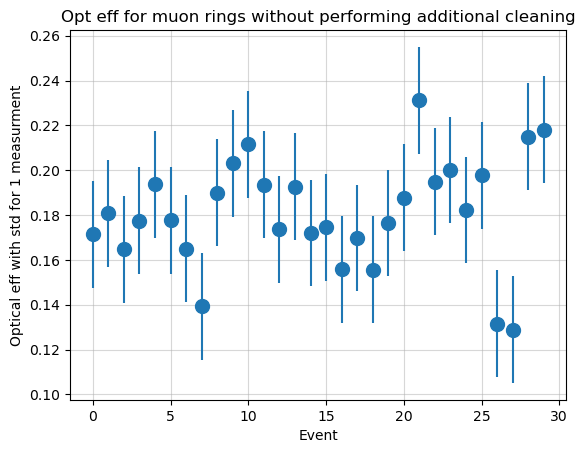

In [43]:
x_range = [i for i in range(len(optical_coef))]
#std_arr = [np.std(optical_coef)/np.mean(optical_coef) for i,j in enumerate(optical_coef)]
std_arr = [np.std(optical_coef) for i,j in enumerate(optical_coef)]
#std_arr = [np.std(opt_eff) for i,j in enumerate(opt_eff)]
plt.xlabel("Event")
#plt.ylabel("Optical eff with rel. error for 1 measurment")
plt.ylabel("Optical eff with std for 1 measurment")
plt.title("Opt eff for muon rings without performing additional cleaning")
plt.grid(alpha=0.5)
#plt.ylim(0,0.4)
plt.scatter(x_range, optical_coef)
plt.errorbar(x_range, optical_coef, yerr=std_arr, fmt='o', ms = 10)#, c = 'blue')#, s = 100)#, c= 'black')

In [ ]:
event_nummer = 1053
print(event_container[event_nummer].muon.tel[1].efficiency)
print(event_container[event_nummer].muon.tel[2].efficiency)
print(event_container[event_nummer].muon.tel[3].efficiency)
tel_nummer = 3

In [ ]:
plt.figure(figsize = (9,6))
camgeom = source.subarray.tel[tel_nummer].camera.geometry
title="Muon Ring?"
disp = CameraDisplay(camgeom,title=title)
disp.image = event_container[event_nummer].simulation.tel[tel_nummer].true_image
#disp.image = true_image
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)
#plt.savefig(f"/Users/vdk/IntensityCut_event{j.index.event_id}")

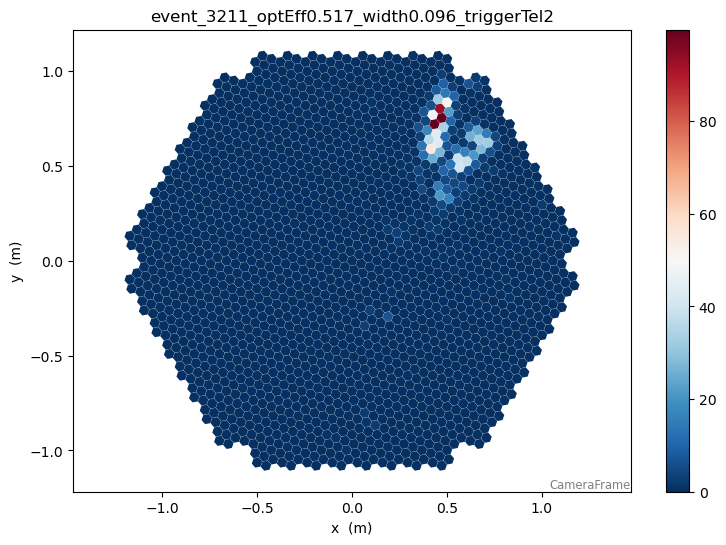

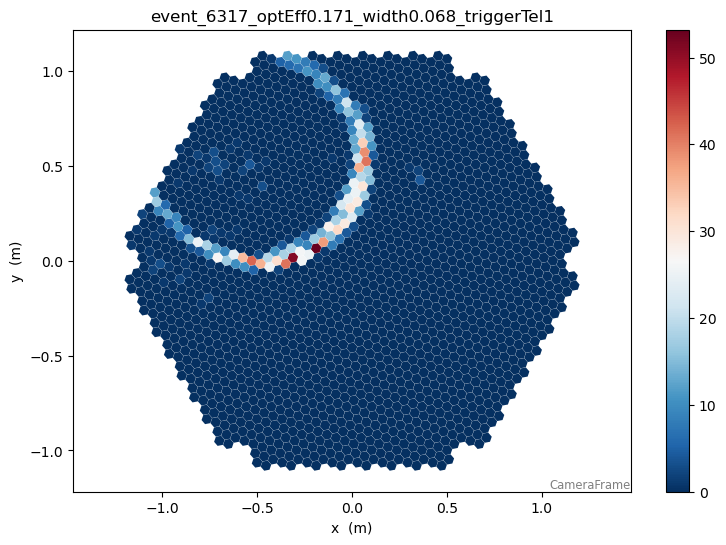

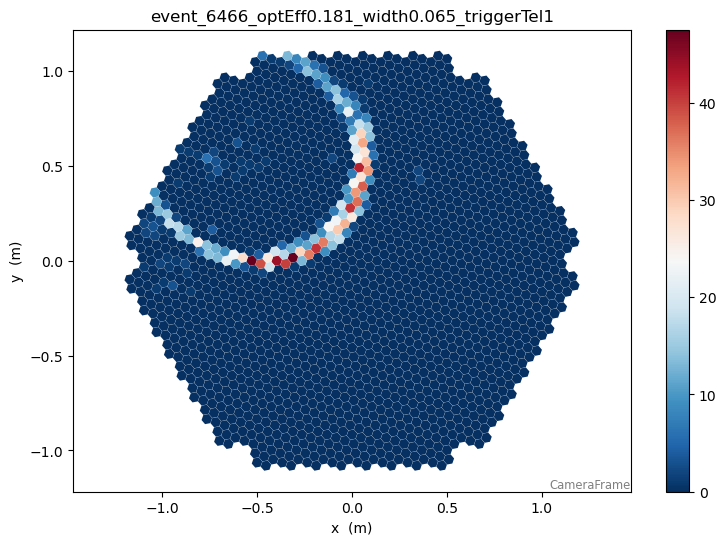

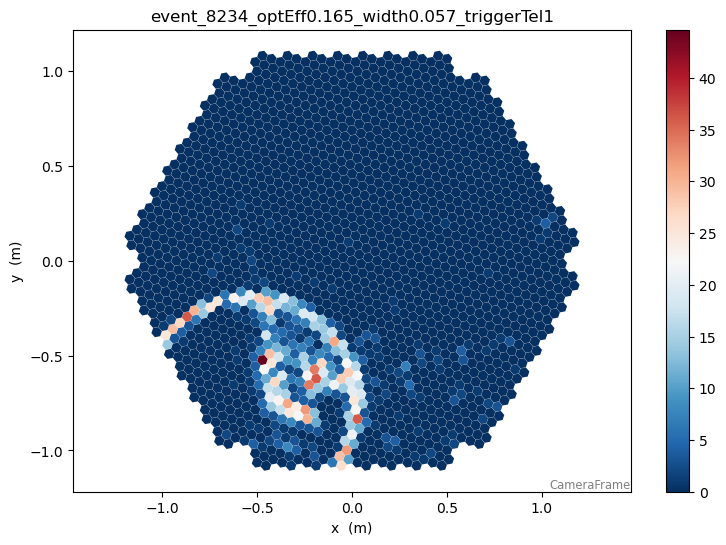

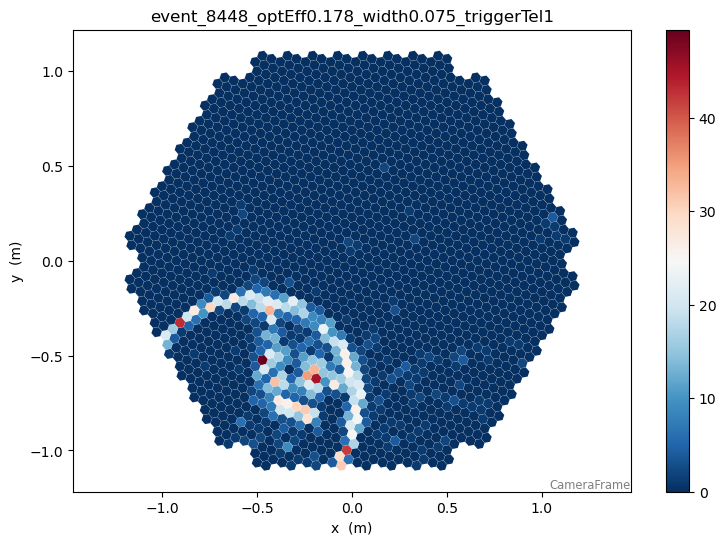

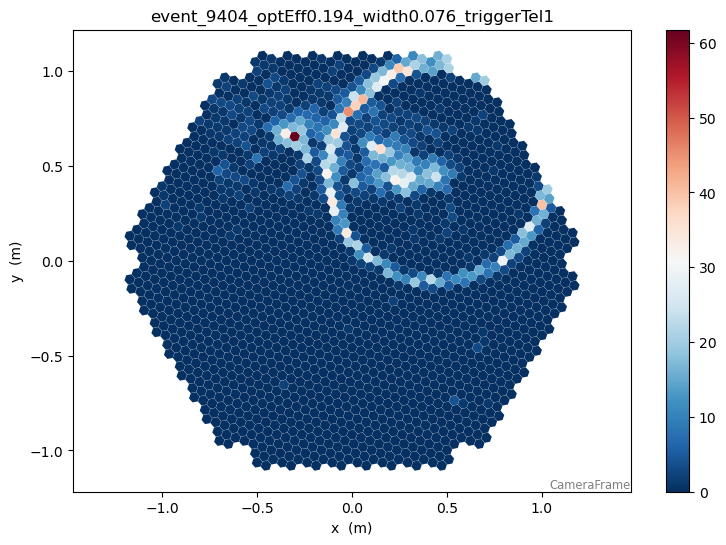

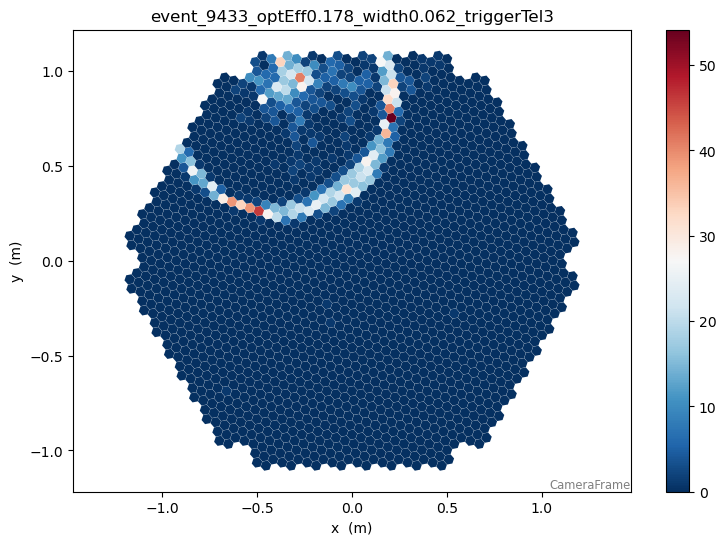

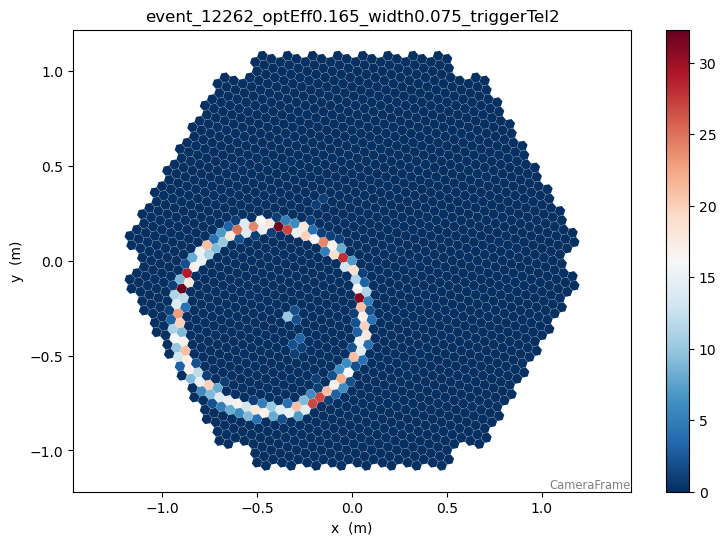

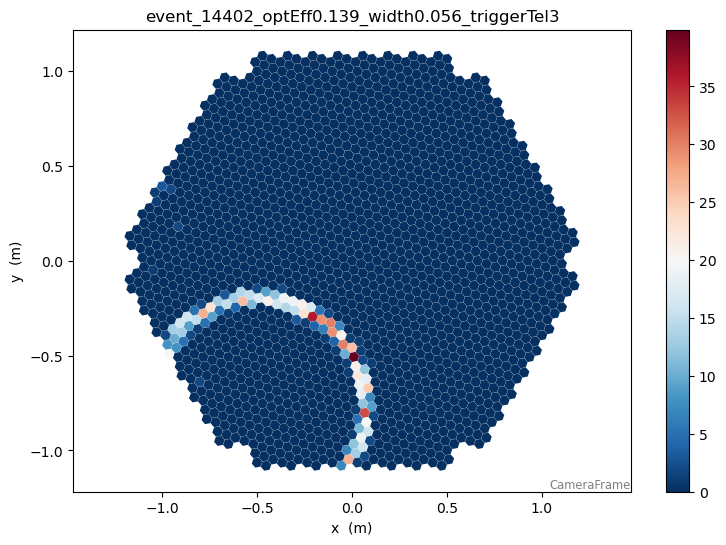

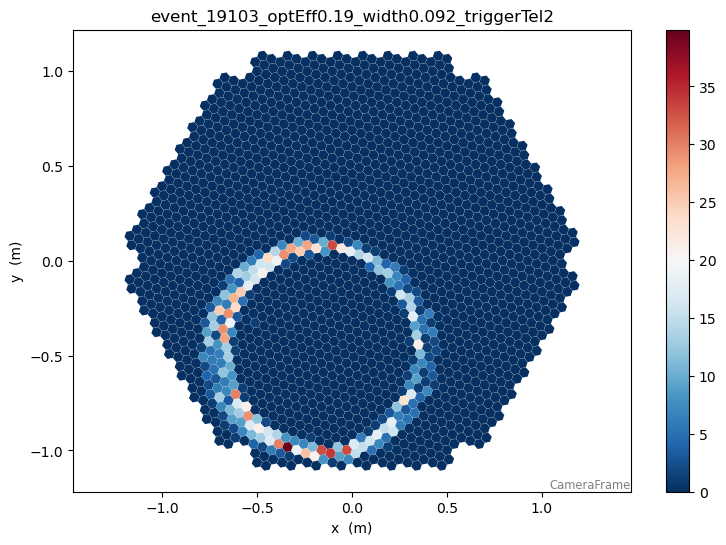

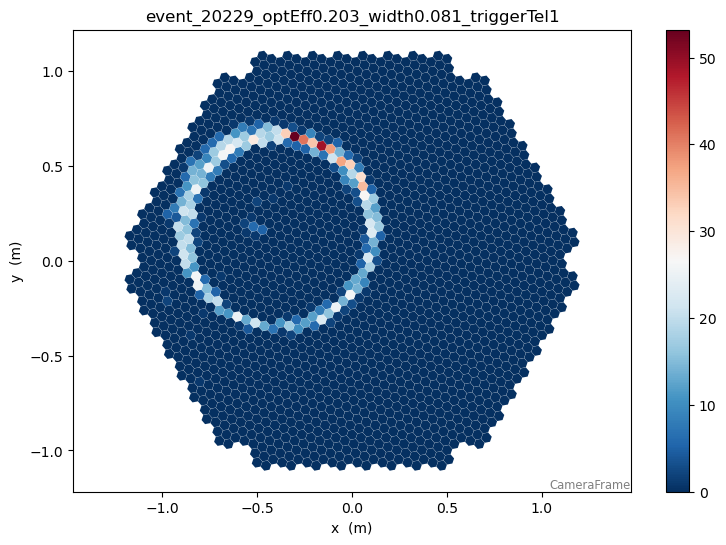

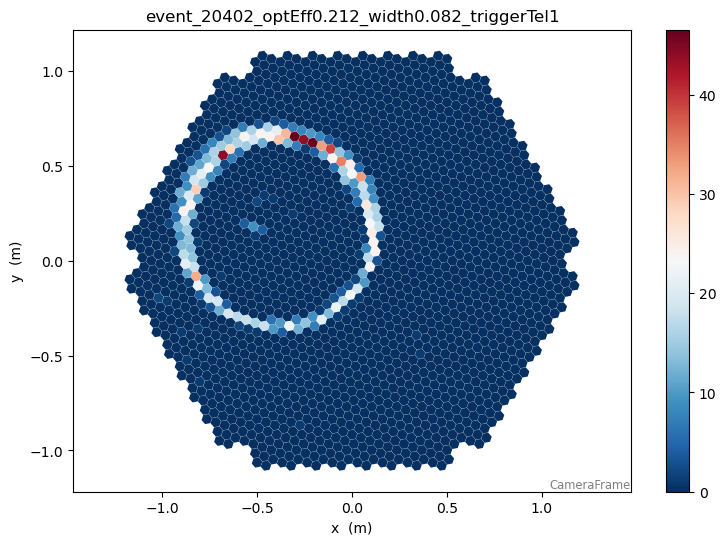

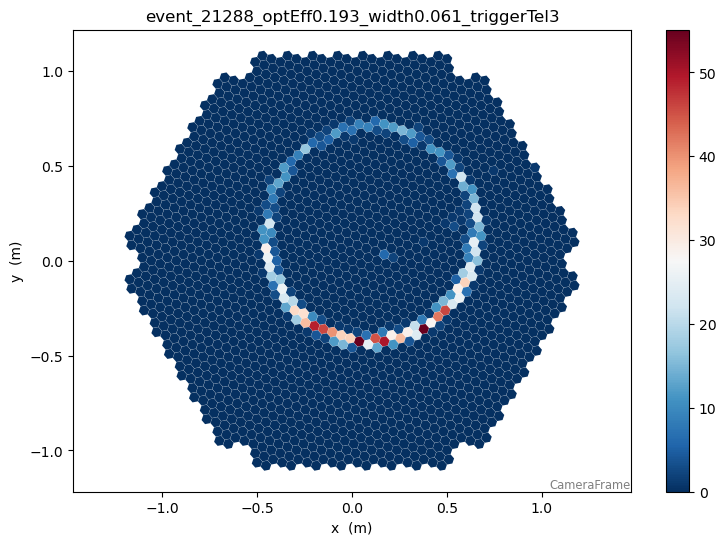

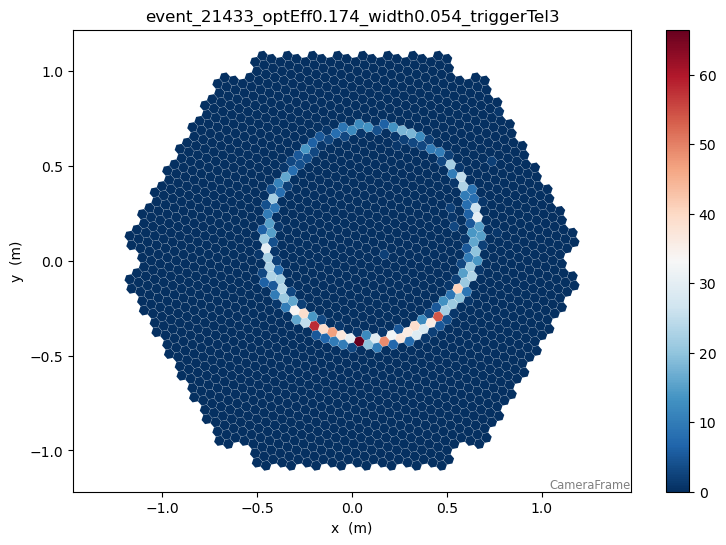

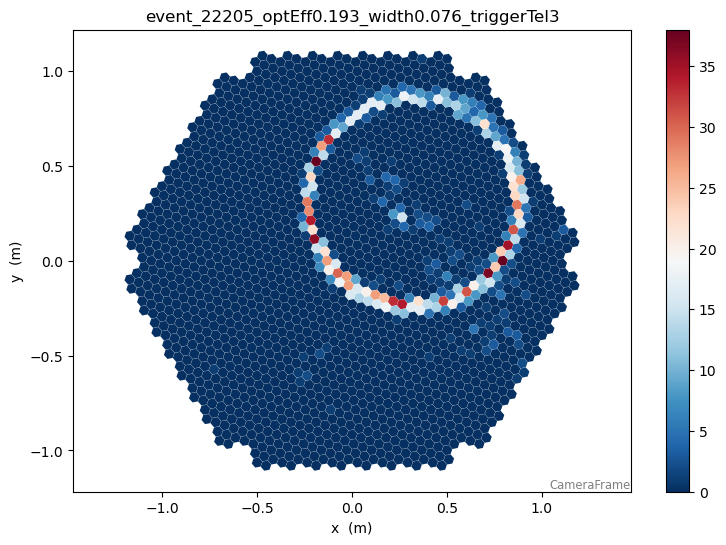

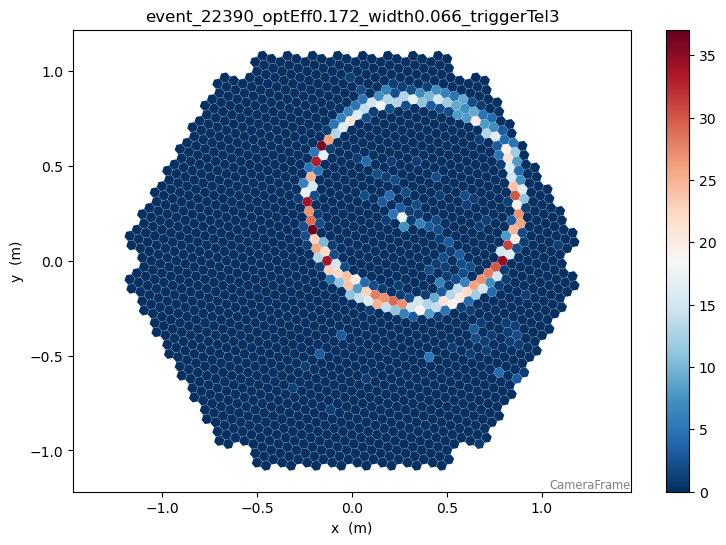

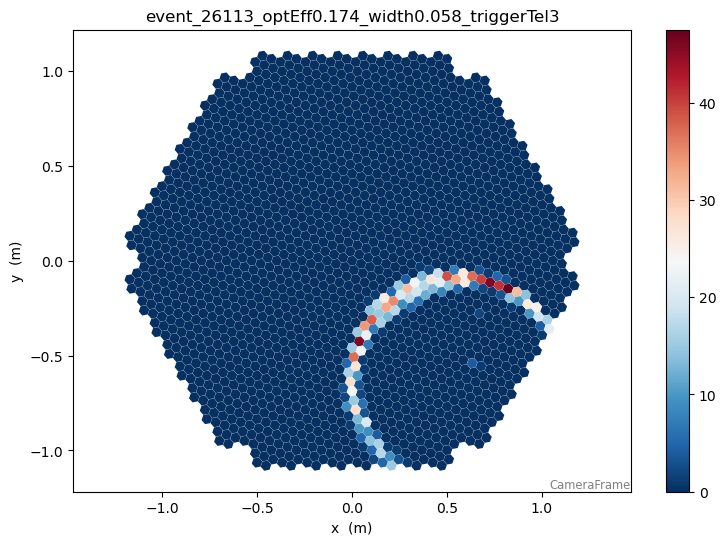

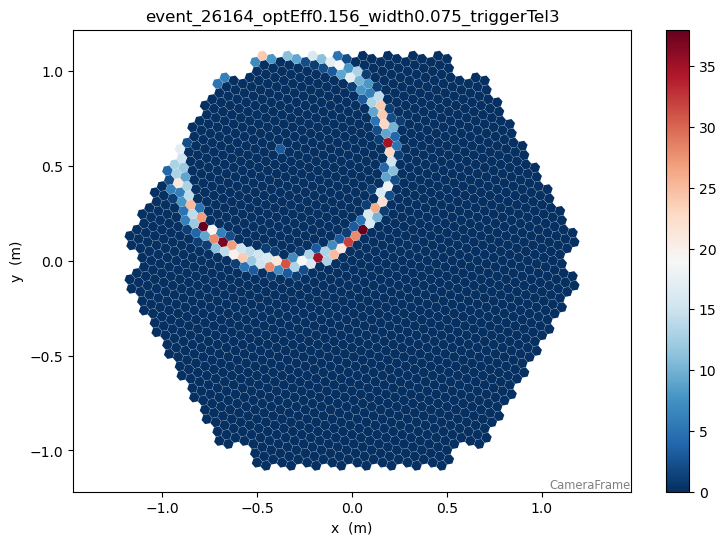

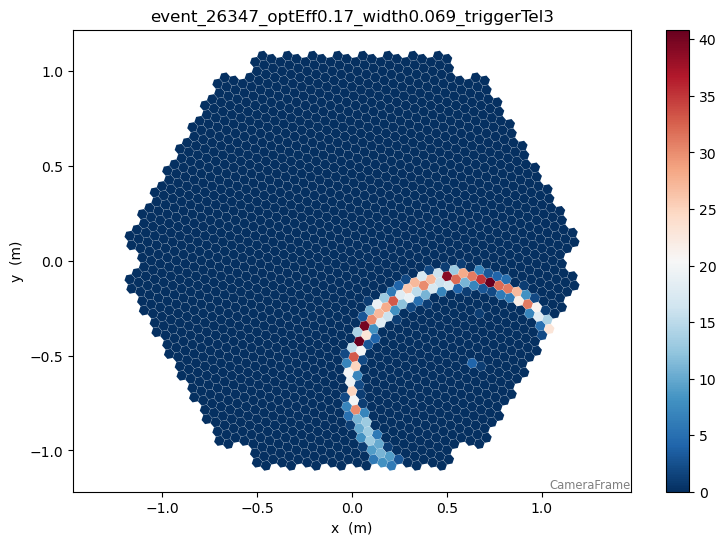

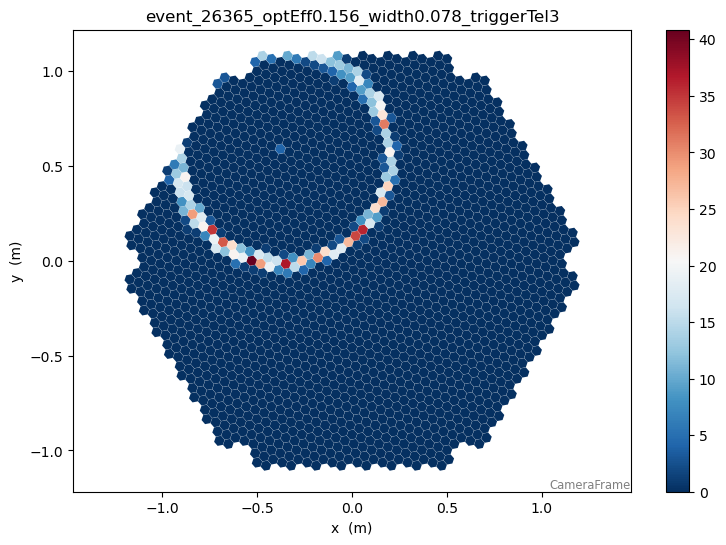

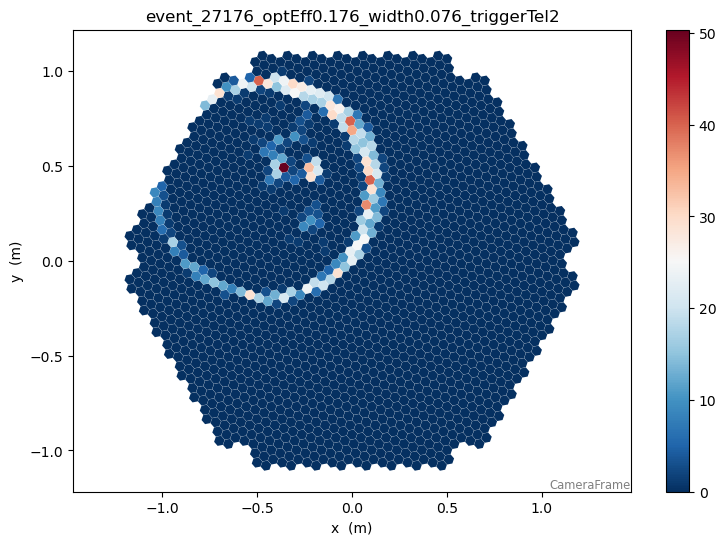

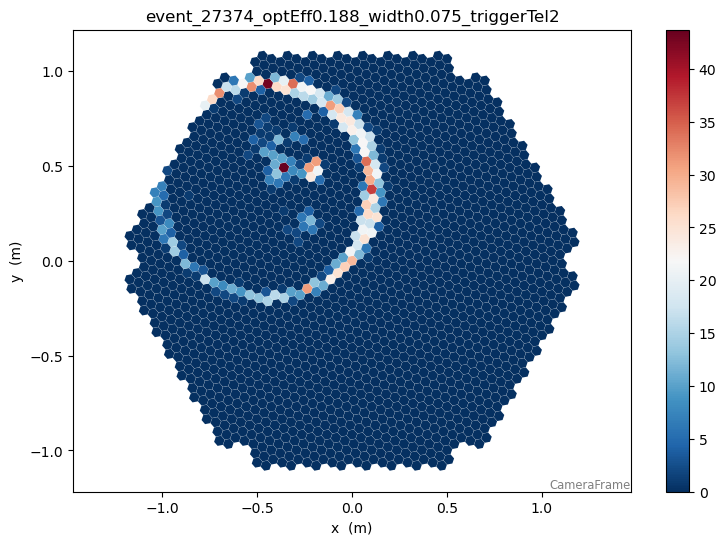

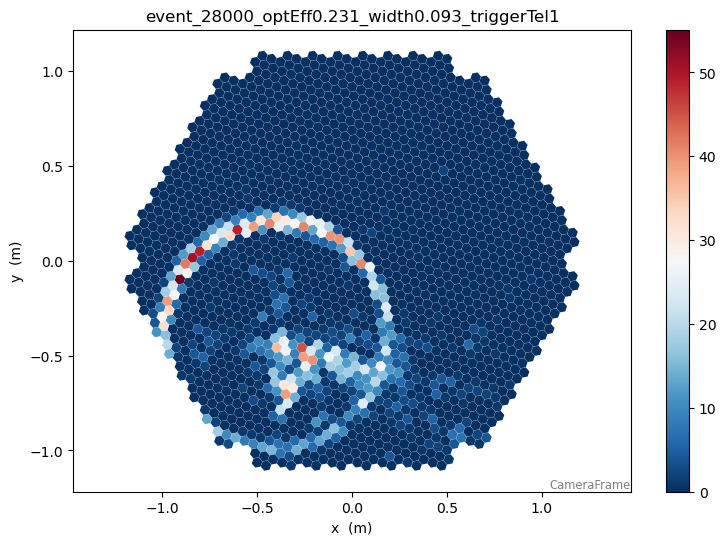

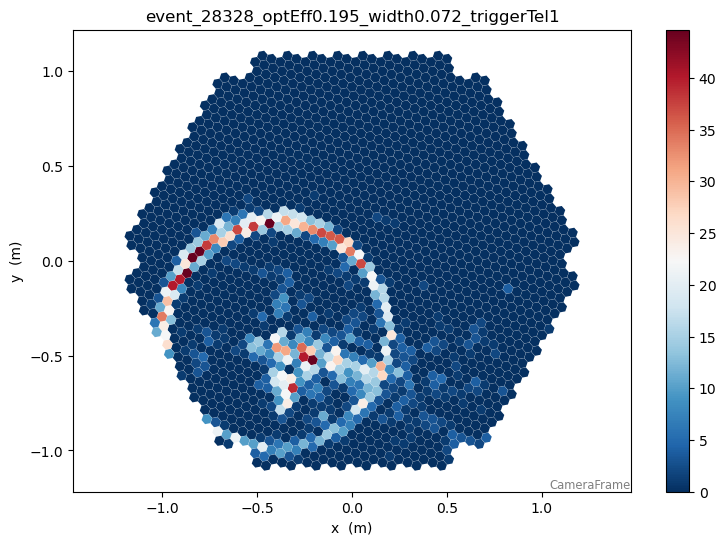

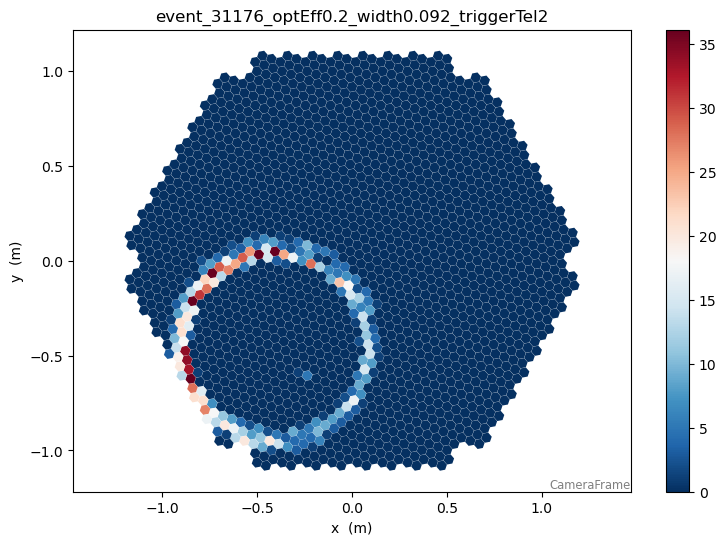

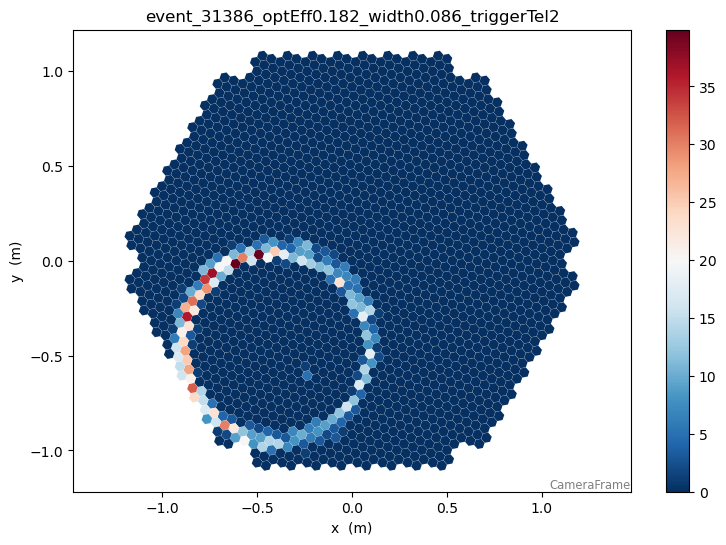

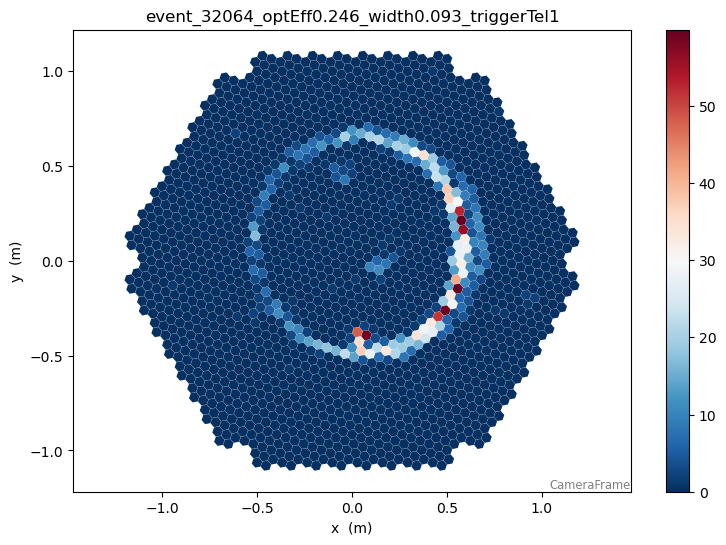

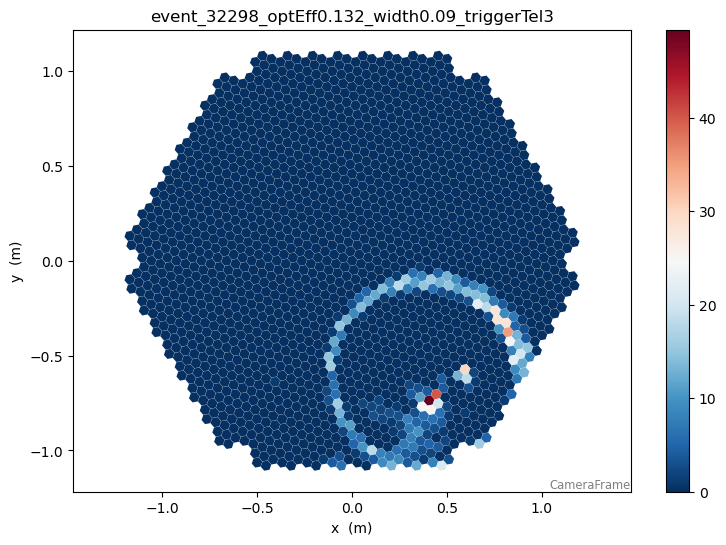

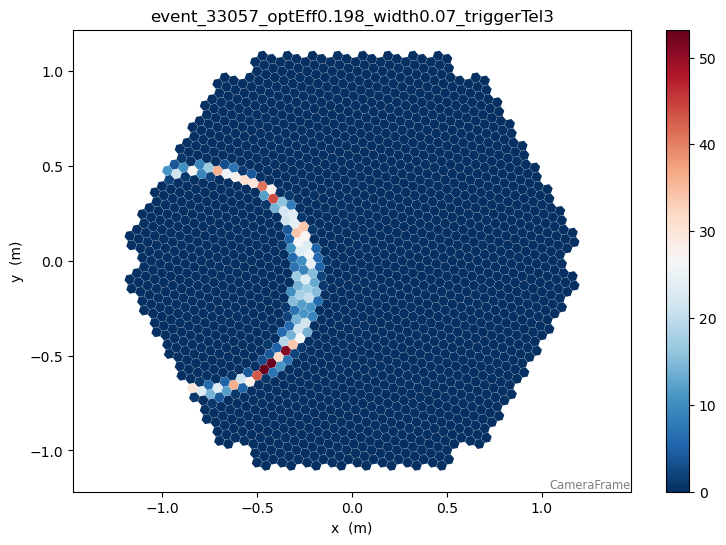

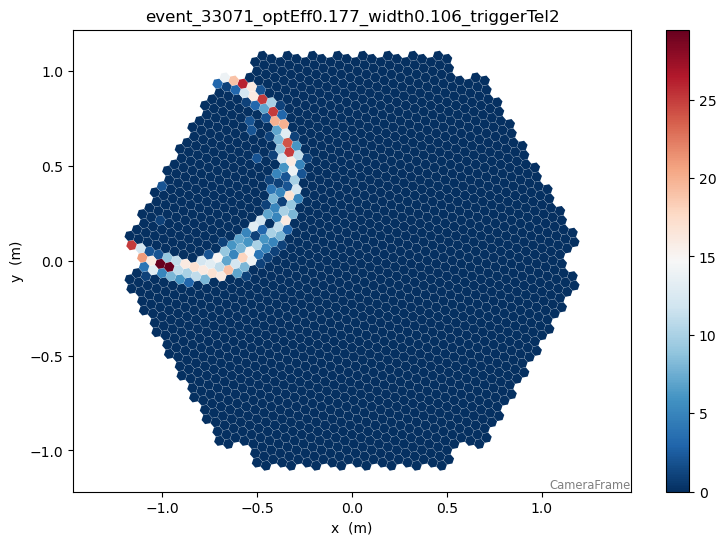

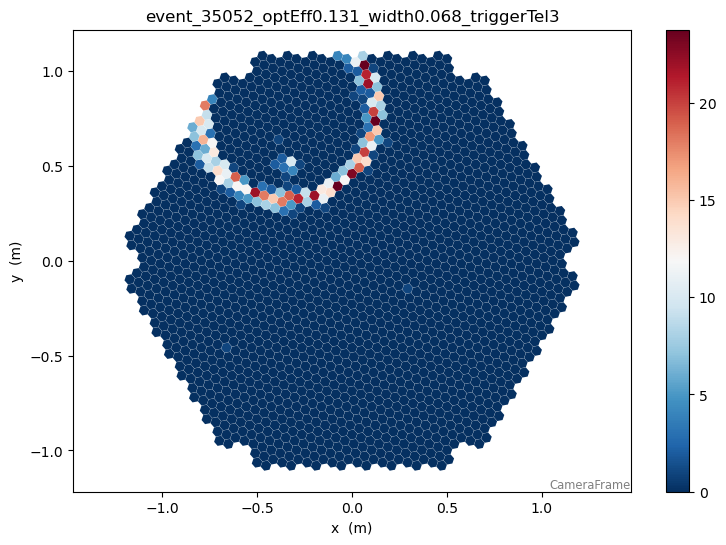

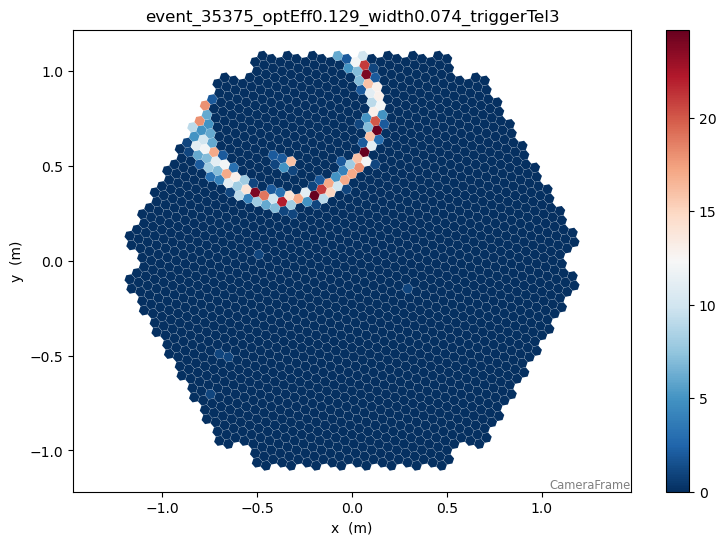

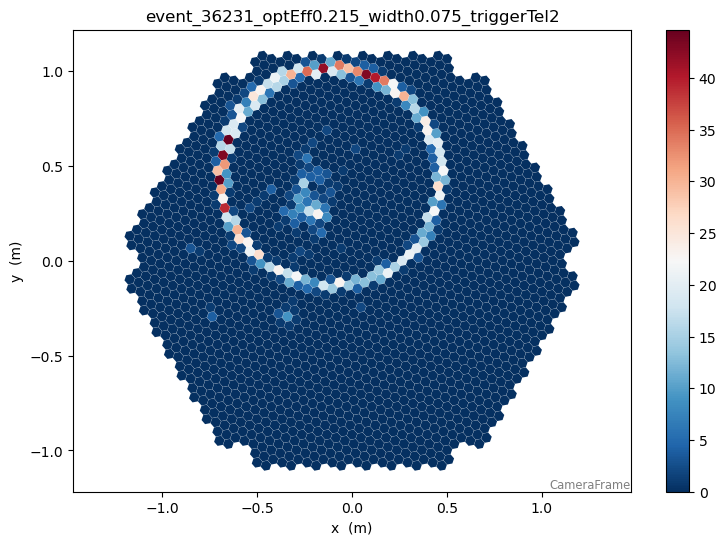

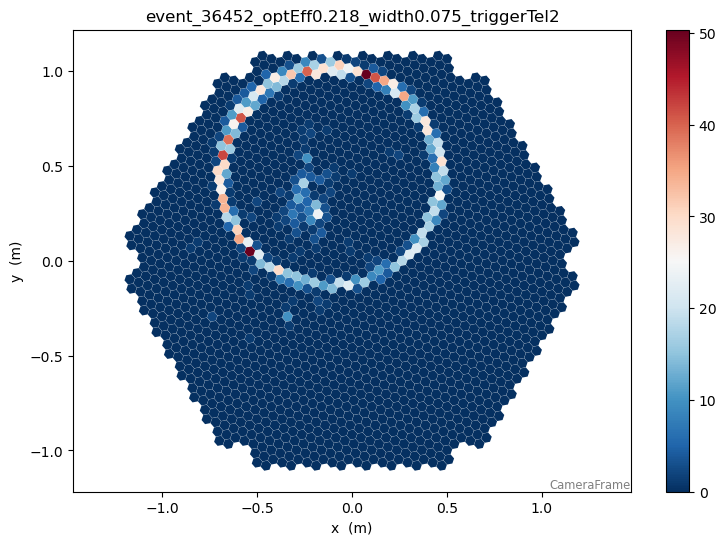

In [47]:
for i in event_container:
    for m in event_container[i].trigger.tel.keys():
        if not np.isnan(event_container[i].muon.tel[m].efficiency.width):
                plt.figure(figsize = (9,6))
                camgeom = source.subarray.tel[m].camera.geometry
                #title=f"event_{i}_optEff{round(event_container[i].muon.tel[m].efficiency.optical_efficiency,3)}_width{round(event_container[i].muon.tel[m].efficiency.width.to_value(),3)}_triggercount{len(event_container[i].trigger.tel.keys())}"
                title=f"event_{i}_optEff{round(event_container[i].muon.tel[m].efficiency.optical_efficiency,3)}_width{round(event_container[i].muon.tel[m].efficiency.width.to_value(),3)}_triggerTel{m}"
                disp = CameraDisplay(camgeom,title=title)
                disp.image = event_container[i].simulation.tel[m].true_image
                disp.cmap = plt.cm.RdBu_r
                disp.add_colorbar()
                disp.set_limits_percent(95)
                #plt.savefig(f"/Users/vdk/MRing_event{i}_fit{round(event_container[i].muon.tel[m].efficiency.optical_efficiency,3)}_width{round(event_container[i].muon.tel[m].efficiency.width.to_value(),3)}.png")
                #plt.savefig(f"/Users/vdk/MRing_event{i}_fit{round(event_container[i].muon.tel[m].efficiency.optical_efficiency,3)}_width{round(event_container[i].muon.tel[m].efficiency.width.to_value(),3)}.png")
                plt.show()
                
plt.close()

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=False, gridspec_kw={'width_ratios': [1, 1]}, figsize=(12,5))
fig.subplots_adjust(hspace=0.2)
dx = axes[0]
camgeom = source.subarray.tel[3].camera.geometry
disp = CameraDisplay(camgeom, ax = dx)
disp.image = event_container[1053].simulation.tel[3].true_image
#disp.image = true_image
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)
dx.set_title("Extracted muon ring")
cx = axes[1]
camgeom = source.subarray.tel[2].camera.geometry
disp = CameraDisplay(camgeom, ax = cx)
disp.image = event_container[1053].simulation.tel[2].true_image
#disp.image = true_image
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)
cx.set_title("Extracted contamination")
#plt.show()
#plt.savefig("/Users/vdk/DistinctRingContamination")

In [ ]:
image_processor = ImageProcessor(source.subarray)
muon_processor = MuonProcessor(source.subarray)
calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum", subarray = source.subarray)
calib(event)
image_processor(event)
muon_processor(event)
np.isnan(j.muon.tel[m].efficiency.width)

In [ ]:
not np.isnan(event.muon.tel[1].efficiency.width)

In [ ]:
if not type(efficiency_container[19]) is int:
    print(1)

In [ ]:
for key in efficiency_container:
    print(efficiency_container[key].optical_efficiency)

In [ ]:
calculated = {}
for i,j in enumerate(efficiency_container):
    if not type(j) is int:
        calculated[i] = j
        

In [ ]:
for i in calculated:
    print(i)

In [ ]:
calculated[2]

In [ ]:
np.radians(0.2)

In [ ]:
len(event_container)

In [ ]:
checker

In [ ]:
164/4227

In [ ]:
3/4227

In [ ]:
3/10000

In [ ]:
for k in range(1,10):
    print(k)

In [ ]:
from traitlets.config import Config

image_processor_config = Config(
    {
        "ImageProcessor": {
            "image_cleaner_type": "TailcutsImageCleaner",
            "TailcutsImageCleaner": {
                "picture_threshold_pe": [
                    ("type", "LST_LST_LSTCam", 7.5),
                    ("type", "MST_MST_FlashCam", 8),
                    ("type", "MST_MST_NectarCam", 8),
                    ("type", "SST_ASTRI_CHEC", 7),
                ],
                "boundary_threshold_pe": [
                    ("type", "LST_LST_LSTCam", 5),
                    ("type", "MST_MST_FlashCam", 4),
                    ("type", "MST_MST_NectarCam", 4),
                    ("type", "SST_ASTRI_CHEC", 4),
                ],
            },
        }
    }
)

In [ ]:
filename = '/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run1.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

event = next(event_iterator)

image_processor = ImageProcessor(source.subarray, config = image_processor_config)
image_processor(event)

In [ ]:
muon_processor_config = Config(
    {
        "MuonProcessor": {
            "RingQuery": {
                ["intensity_check","np.abs(parameters.intensity_ratio - 1) < 0.1"]
            }
        }
        "MuonIntensityFitter" :{
        "hole_radius_m" : ["type", "LST_*", 0.308]
        }
    }

)

In [ ]:
7/(18295)*100

In [ ]:
14068+4227

In [ ]:
k = 2
filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

for i,j in enumerate(event_iterator):
    if i == 223:
        plt.figure(figsize = (9,6))
        camgeom = source.subarray.tel[3].camera.geometry
        title="Muon Ring?"
        disp = CameraDisplay(camgeom,title=title)
        disp.image = j.simulation.tel[2].true_image
        #disp.image = true_image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        plt.show()
        break
        #plt.savefig(f"/Users/vdk/IntensityCut_event{j.index.event_id}")
        

In [ ]:
len(for_hist)

In [ ]:
for_hist = []
check = 0

for i in event_container:
    #print(i)
    #check+=1
    for m in event_container[i].trigger.tel.keys():
        if not np.isnan(event_container[i].muon.tel[m].efficiency.width):
            #print(check)
            #print("m", m)
            #print("i", i)
            peak_arr = np.empty(1855, dtype = int)
            np.argmax(event_container[i].r0.tel[m].waveform[1], axis = 1, out = peak_arr)
            #print(check,peak_arr)
            for_hist = np.append(for_hist, peak_arr) 
            check += 1

In [ ]:
histplot(for_hist, alpha = 0.8, binwidth = 1, binrange=[0,40])
plt.xlabel("Time sample")
plt.ylabel("Count of pixels with appropriate peaktime")
#plt.title(f"Histogram for peaktime of 40 runs minpixel > {min_pixel}")
#plt.savefig(f"/Users/vdk/Histplot_40runs_PeakTime_minpixel>{min_pixel}")
#plt.title(f"Histogram for peaktime of 40 runs IntensityCut<{int_cut}")
plt.title(f"Histogram for r0 high gain")
#plt.savefig(f"/Users/vdk/Histplot_40runs_IntensityCut>{int_cut}.png")

In [ ]:
test = histplot(for_hist, alpha = 0.8, bins = [i-0.5 for i in range(41)])
plt.title(f"Histogram for r0 low gain")

In [ ]:
hist, bin_edges = np.histogram(for_hist, bins =40)

In [ ]:
bin_edges

In [ ]:
plt.hist(for_hist, bins = [i for i in range(41)])

In [ ]:
min(for_hist)

In [ ]:
len(hist)

In [ ]:
bin_edges

In [ ]:
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(for_hist)

commutes.plot.hist(grid=True, bins=40, rwidth=1,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [ ]:
len([-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5,21.5,22.5,23.5,24.5,25.5,26.5,27.5,28.5,29.5,30.5,31.5,32.5,33.5,34.5,35.5,36.5,37.5,38.5,39.5])

In [ ]:
for i in range(0,41):
    print(i-0.5)

In [ ]:
arr = [1,6,3,2,5,5,6,4,4,4,3,3,3,2,6]
histplot(arr)

In [ ]:
for i in for_hist:
    print(i)

In [ ]:
np.count(for_hist,1)

In [ ]:
other = for_hist.tolist()

In [ ]:
other.count(38)

In [ ]:
np.char.count(arr,'1')

In [ ]:
for_hist = []
check = 0
time_sample = 24

for i in event_container:
    for m in event_container[i].trigger.tel.keys():
        if not np.isnan(event_container[i].muon.tel[m].efficiency.width):
            max_val = np.amax(event_container[i].r1.tel[m].waveform[time_sample])
            event_list = event_container[i].r1.tel[m].waveform[time_sample].tolist()
            #print("max", max_val)
            #print("events", event_container[i].r1.tel[m].waveform.shape)
            counts = event_list.count(max_val)
            print("counts = ", counts)
            
            

In [ ]:
for_hist = []
check = 0

for i in event_container:
    for m in event_container[i].trigger.tel.keys():
        if not np.isnan(event_container[i].muon.tel[m].efficiency.width):
            peak_arr = np.empty(1855, dtype = int)
            np.argmax(event_container[i].r1.tel[m].waveform, axis = 1, out = peak_arr)
            print(check,peak_arr)
            for_hist = np.append(for_hist, peak_arr) 
            check += 1

winner = np.argwhere(event_container[i].r1.tel[m].waveform == np.amax(event_container[i].r1.tel[m].waveform))

In [ ]:
winner = np.argwhere(event_container[i].r1.tel[m].waveform == np.amax(event_container[i].r1.tel[m].waveform))

In [ ]:
winner

In [ ]:
k = 22
event_number = 86
teln = 3
filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

for i,j in enumerate(event_iterator):
    if i == event_number:
        image_processor = ImageProcessor(source.subarray)
        muon_processor = MuonProcessor(source.subarray)
        calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum",subarray = source.subarray)
        calib(j)
        image_processor(j)
        muon_processor(j)
        event = j
        break


# check only pixels where signal is less then some value
# mean value for all pixels sum over the samples is 6200
#work_arr = event.r0.tel[1].waveform[0].copy()
#work_arr[np.sum(work_arr, axis = 1) > 10000] = 0
#teln = 2
#print(np.count_nonzero(work_arr))

plt.figure(figsize = (9,6))
camgeom = source.subarray.tel[1].camera.geometry
title="Ring"
disp = CameraDisplay(camgeom,title=title, norm = 'lin', autoscale = False, allow_pick = True)

disp.image = event.r0.tel[teln].waveform[1].sum(axis=1)
#disp.image = event.dl0.tel[teln].waveform[:,11]
#disp.image = working_arr
#disp.image = event.simulation.tel[teln].true_image
#disp.image = cont_arr
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)
print("print", disp.pixels)
#plt.savefig(f"/Users/vdk/IntensityCut_event{j.index.event_id}")

In [ ]:
event_container[22086].r1.tel[2].selected_gain_channel

In [ ]:
for i in event_container[22086].simulation.shower.energy

In [ ]:
###
# Algorithm to process events and try to calibrate them
###
int_cut = 0.2
min_pixel = 250

muon_processor_config = Config({"MuonProcessor": 
                                {"RingQuery": 
                                 {"quality_criteria" : [["intensity_check",f"np.abs(parameters.intensity_ratio - 1) < {int_cut}"],
                                                        ["ring_containment", "parameters.containment > 0.3"],
                                                        ["ring_completeness", "parameters.completeness > 0.3"]]}}})

#muon_processor_config = Config({"MuonProcessor":
#                                {"ImageParameterQuery" :
#                                {"quality_criteria" : [["min_pixels", f"dl1_params.morphology.n_pixels > {min_pixel}"],
#                                                        ["min_intensity", "dl1_params.hillas.intensity > 500"]]}}})

muon_processor_config_2 = Config({"MuonProcessor":
                                {"ImageParameterQuery" :
                                 {"quality_criteria" : [["min_pixels", f"dl1_params.morphology.n_pixels > {min_pixel}"],
                                                        ["min_intensity", "dl1_params.hillas.intensity > 500"]]}}})
#k = 1
checker = 0
event_container_protons = []

for k in range(1,41):
    filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
    source = EventSource(filename, max_events=9000)
    event_iterator = iter(source)
    keks = k*1000
    for i,j in enumerate(event_iterator):
        checker += 1
        if len(j.trigger.tels_with_trigger) > 1:
            image_processor = ImageProcessor(source.subarray)
            muon_processor = MuonProcessor(source.subarray, config = muon_processor_config_2)
            #muon_processor = MuonProcessor(source.subarray)
            calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum",subarray = source.subarray)
            calib(j)
            image_processor(j)
            muon_processor(j)
            for m in j.muon.tel.keys():
                if not np.isnan(j.muon.tel[m].efficiency.width):
                    event_container_protons.append(j)
    if len(event_container_protons) > 43:
        break
        
            
            


In [ ]:
len(event_container_protons)

In [ ]:
for i,j in enumerate(event_container_protons):
    for m in j.trigger.tel.keys():
        if not np.isnan(j.muon.tel[m].efficiency.width):
                plt.figure(figsize = (9,6))
                camgeom = source.subarray.tel[m].camera.geometry
                #title=f"event_{i}_optEff{round(event_container[i].muon.tel[m].efficiency.optical_efficiency,3)}_width{round(event_container[i].muon.tel[m].efficiency.width.to_value(),3)}_triggercount{len(event_container[i].trigger.tel.keys())}"
                #title=f"event_{i}_optEff{round(event_container[i].muon.tel[m].efficiency.optical_efficiency,3)}_width{round(event_container[i].muon.tel[m].efficiency.width.to_value(),3)}_triggerTel{m}"
                disp = CameraDisplay(camgeom,title=title)
                disp.image = j.simulation.tel[m].true_image
                disp.cmap = plt.cm.RdBu_r
                disp.add_colorbar()
                disp.set_limits_percent(95)
                #plt.savefig(f"/Users/vdk/MRing_event{i}_fit{round(event_container[i].muon.tel[m].efficiency.optical_efficiency,3)}_width{round(event_container[i].muon.tel[m].efficiency.width.to_value(),3)}.png")
                #plt.savefig(f"/Users/vdk/MRing_event{i}_fit{round(event_container[i].muon.tel[m].efficiency.optical_efficiency,3)}_width{round(event_container[i].muon.tel[m].efficiency.width.to_value(),3)}.png")
                plt.show()
                
plt.close()

In [ ]:
for_hist_muons = []
check = 0
bad_muons = [2277, 8234,  8448, 9404,  9433, 13088, 18054, 20351, 27176, 27374, 28000, 28328, 35298, 35473]

for i in event_container:
    #print(i)
    #check+=1
    for m in event_container[i].trigger.tel.keys():
        if not np.isnan(event_container[i].muon.tel[m].efficiency.width) and i not in bad_muons:
            #print(check)
            #print("m", m)
            #print("i", i)
            peak_arr = np.empty(1855, dtype = int)
            np.argmax(event_container[i].r0.tel[m].waveform[1], axis = 1, out = peak_arr)
            #print(check,peak_arr)
            for_hist_muons = np.append(for_hist_muons, peak_arr) 
            check += 1

In [ ]:
len(for_hist_muons)/1855

In [ ]:
for_hist_protons = []
check = 0
bad_muons = [2277, 8234,  8448, 9404,  9433, 13088, 18054, 20351, 27176, 27374, 28000, 28328, 35298, 35473]

for i,j in enumerate(event_container_protons[2:33]):
    #print(i)
    #check+=1
    for m in j.trigger.tel.keys():
        if not np.isnan(j.muon.tel[m].efficiency.width):
            #print(check)
            #print("m", m)
            #print("i", i)
            peak_arr = np.empty(1855, dtype = int)
            np.argmax(j.r0.tel[m].waveform[1], axis = 1, out = peak_arr)
            #print(check,peak_arr)
            for_hist_protons = np.append(for_hist, peak_arr) 
            check += 1

In [ ]:
len(for_hist_protons)/1855

In [ ]:
stack = np.vstack((for_hist_muons,for_hist_protons))

In [ ]:
len(stack[0])

In [ ]:
for i in stack:
    histplot(i, bins = 40, alpha = 0.1)

In [11]:
k = 13
if k in [13,14,15]:
    print(True)

True


In [17]:
muon_processor_config = Config({"MuonProcessor": 
                                {"RingQuery": 
                                 {"quality_criteria" : [["intensity_check",f"np.abs(parameters.intensity_ratio - 1) < {int_cut}"],
                                                        ["ring_containment", "parameters.containment > 0.5"],
                                                        ["ring_completeness", "parameters.completeness > 0.5"]]}}})

#muon_processor_config = Config({"MuonProcessor":
#                                {"ImageParameterQuery" :
#                                {"quality_criteria" : [["min_pixels", f"dl1_params.morphology.n_pixels > {min_pixel}"],
#                                                        ["min_intensity", "dl1_params.hillas.intensity > 500"]]}}})

muon_processor_config_2 = Config({"MuonProcessor":
                                {"ImageParameterQuery" :
                                 {"quality_criteria" : [["min_pixels", f"dl1_params.morphology.n_pixels > {min_pixel}"],
                                                        ["min_intensity", "dl1_params.hillas.intensity > 500"]]}}})

checker = 0
event_container = {}
for k in range(1,5):
    filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
    source = EventSource(filename, max_events=9000)
    event_iterator = iter(source)
    keks = k*1000
    for i,j in enumerate(event_iterator):
        checker += 1
        if len(j.trigger.tels_with_trigger) > 1: 
            #print('i am here')
            event = j
            image_processor = ImageProcessor(source.subarray)
            calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum",subarray = source.subarray)
            calib(event)
            image_processor(event)
            for m in event.muon.tel.keys():
                print('i am here')
                print(event.muon.tel[m].parameters)
            #muon_processor = MuonProcessor(source.subarray, config = muon_processor_config)
            #image_processor = ImageProcessor(source.subarray)
            #muon_processor = MuonProcessor(source.subarray)
            #muon_processor(event)
            #for m in j.muon.tel.keys():
            #    if not np.isnan(j.muon.tel[m].efficiency.width):
            #        event_container[keks+i] = j

KeyboardInterrupt: 

In [21]:
print(event.muon.tel[1].parameters)

{'completeness': nan,
 'containment': nan,
 'intensity_ratio': nan,
 'mean_squared_error': <Quantity nan deg2>}


In [38]:
for i in event_container:
    for m in event_container[i].trigger.tel.keys():
            print(event_container[i].muon.tel[m].efficiency.optical_efficiency)

0.17138435092025528
nan
0.18078114713142956
nan
0.16472505927141978
nan
nan
0.17750354540432856
nan
nan
0.19365775369948546
nan
nan
nan
nan
0.17756622663556332
0.16496277756806133
nan
nan
0.13928806352220602
0.19004278985555878
nan
0.20310415600792808
nan
0.21154015000153015
nan
nan
nan
0.19344571771112484
nan
nan
0.1737233316411837
nan
nan
0.1926916580246525
nan
nan
0.17200076835209277
nan
nan
0.17449896125716746
nan
nan
0.15584250122517096
nan
nan
0.1697275880821416
nan
nan
0.15556003447134392
nan
0.17647664130266927
nan
nan
0.18780941321116074
nan
0.23116538840620926
nan
nan
0.19487179111814545
nan
nan
0.20007782400593532
nan
0.1822752080238479
nan
nan
0.19772709356770468
nan
nan
0.1314953016083491
nan
nan
0.12892231978901614
nan
0.215013470704557
nan
nan
0.21812311796524986
nan
